# Practice 5-2. Demand function modeling

In [8]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# packages for statistical analysis 
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as stats_m

from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

In [23]:
def myTSplot(x, label=None):
    dfChicken[x].plot()
    plt.title('Plot of '+ label)
    plt.xticks(range(23), dfChicken['year'], rotation='vertical')
    plt.grid()
    plt.show()

##  CASE-STUDY: *Modeling demand function of a product*

## 1. Getting and describing the data

### 1.1. Import the data

In [24]:
# read the data from MS Excel file
dfChicken = pd.read_excel('chicken.xlsx', 'data', index_col=None, na_values=['NA'])

In [25]:
# look at the head of the data frame
dfChicken.head(n=5)

,year,qc,pc,inc,pp,pb
0,1960,27.8,42.2,397.5,50.7,78.3
1,1961,29.9,38.1,413.3,52.0,79.2
2,1962,29.8,40.3,439.2,54.0,79.2
3,1963,30.8,39.5,459.7,55.3,79.2
4,1964,31.2,37.3,492.9,54.7,77.4


### 1.2. Descriptive analysis

In [26]:
# calculate basic descriptive statistics
dfChicken.describe().round(2)

,year,qc,pc,inc,pp,pb
count,23.00,23.00,23.00,23.00,23.00,23.00
mean,1971.00,39.67,48.00,1035.07,90.40,124.43
std,6.78,7.37,11.12,617.85,35.22,51.50
min,1960.00,27.80,37.30,397.50,50.70,77.40
25%,1965.50,34.45,38.95,544.45,64.10,80.30
50%,1971.00,40.30,40.30,843.30,73.20,106.10
75%,1976.50,43.40,58.10,1399.50,125.75,143.25
max,1982.00,52.90,70.40,2478.70,168.20,232.60


### 1.3. Graphical analysis: individual time-series graphs

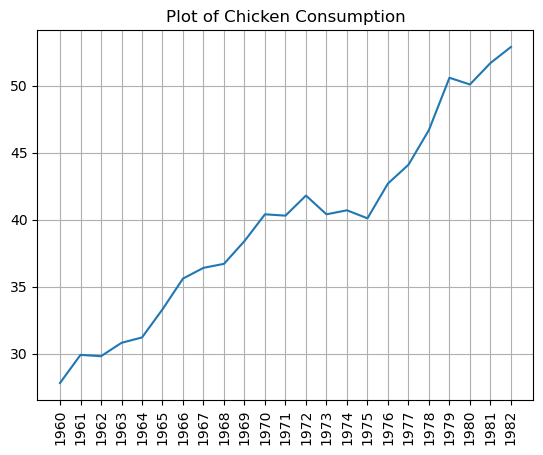

In [27]:
# Plot of Chicken Consumption
myTSplot('qc', 'Chicken Consumption')

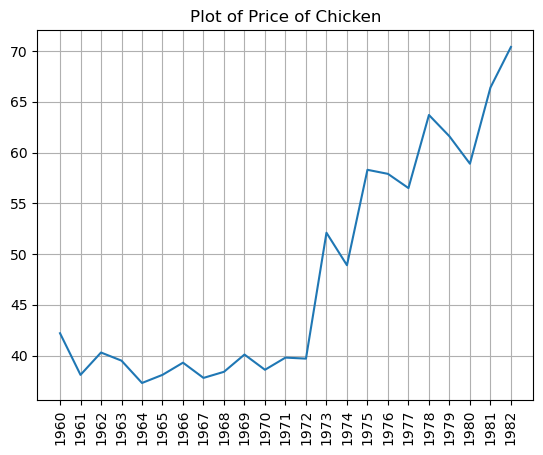

In [28]:
# Plot of Price of Chicken
myTSplot('pc', 'Price of Chicken')

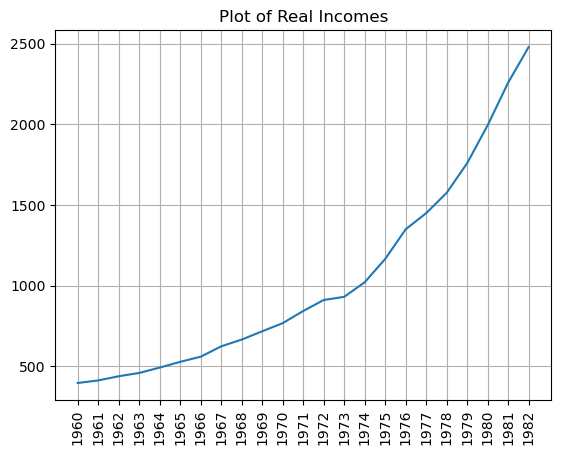

In [29]:
# Plot of Real Incomes
myTSplot('inc', 'Real Incomes')

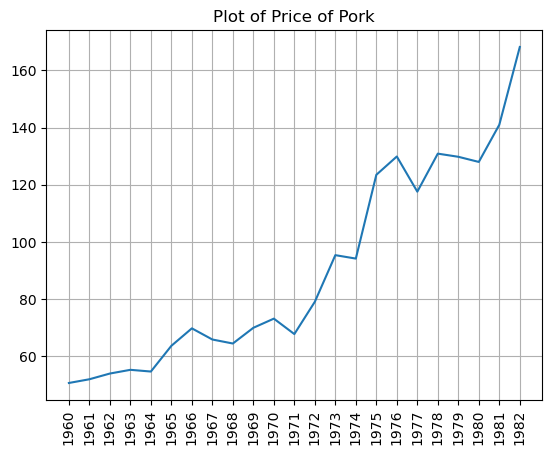

In [30]:
# Plot of Price of Pork
myTSplot('pp', 'Price of Pork')

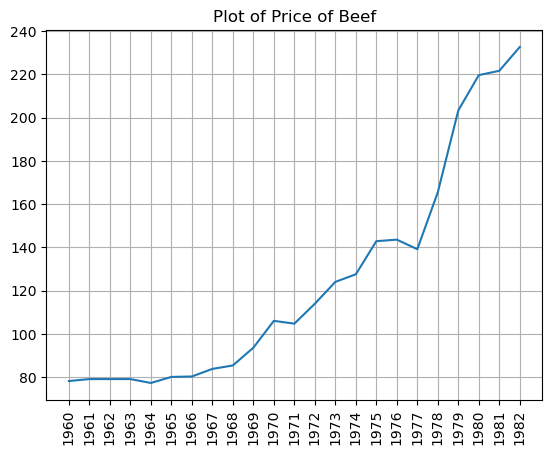

In [31]:
# Plot of Price of Beef
myTSplot('pb', 'Price of Beef')

## 2. Running a simple pair-wise analysis

In [32]:
# extract Qc and Pc
qc = dfChicken['qc']
pc = dfChicken['pc']

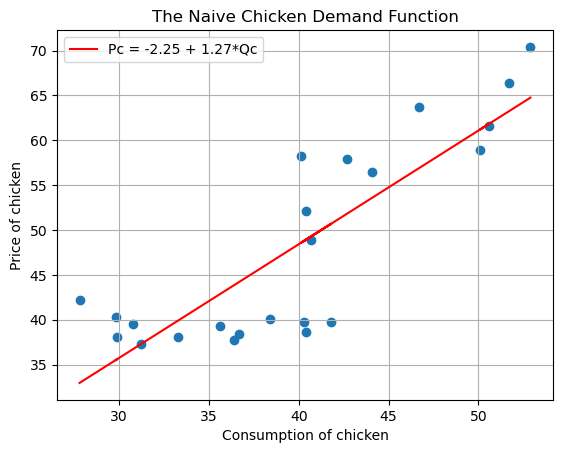

In [34]:
# scatter plot
plt.scatter(qc, pc)
plt.xlabel("Consumption of chicken")
plt.ylabel("Price of chicken")
plt.title("The Naive Chicken Demand Function")
plt.grid()

#regression part
slopeY, interceptY, _, _, _ = stats.linregress(qc,pc)
lineY = slopeY*qc+interceptY
plt.plot(qc, lineY, 'r', label='Pc = {:.2f} + {:.2f}*Qc'.format(interceptY, slopeY))
#end

plt.legend()
plt.show()

In [35]:
# run a pair-wise correlation analysis
coefPears, pvPears= stats.pearsonr(qc, pc)

print("Pearson's correlation = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation =  0.84
Pearson's p-value =  0.0


## 3. Linear regression analysis

### 3.1. MODEL 1: Multivariate linear regression

In [36]:
# estimate Model 1
model1 = ols('qc ~ pc + inc + pp + pb', dfChicken).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     qc   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     73.87
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           6.43e-11
Time:                        10:39:59   Log-Likelihood:                -45.214
No. Observations:                  23   AIC:                             100.4
Df Residuals:                      18   BIC:                             106.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2324      3.718     10.015      0.000      29.422      45.043
pc            -0.6112      0.163     -3.753      0.001      -0.953      -0.269
inc            0.0050      0.005      1.024      0.319      -0.005       0.015
pp             0.1984      0.064      3.114      0.006       0.065       0.332
pb             0.0695      0.051      1.363      0.190      -0.038       0.177
==============================================================================
Omnibus:                        2.004   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.088
Skew:                           0.098   Prob(JB):                        0.580
Kurtosis:                       1.953   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.2. Tests of disturbances of Model 1

In [37]:
# store model residuals
resids1 = model1.resid

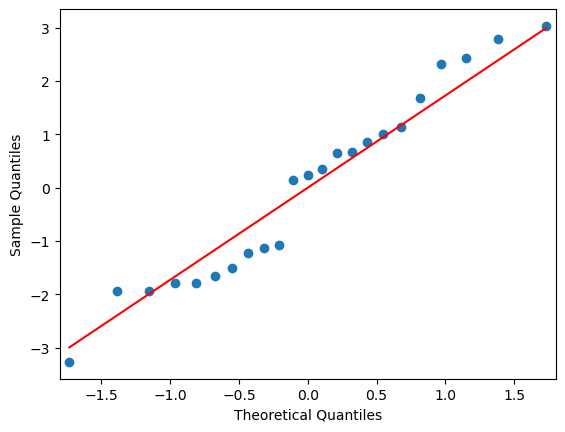

In [38]:
# Visual Normality Test
qqplot(resids1, line='s');

# Jarque-Bera test results are in the summary of Model 1

In [39]:
# The Breusch-Pagan heteroskedasticity test
BPtest = pd.DataFrame(stats_m.diagnostic.het_breuschpagan(resids1, model1.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(BPtest)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  6.428253
chi^2 test p-value    0.169368
F-test statistic      1.745570
F-test p-value        0.183967


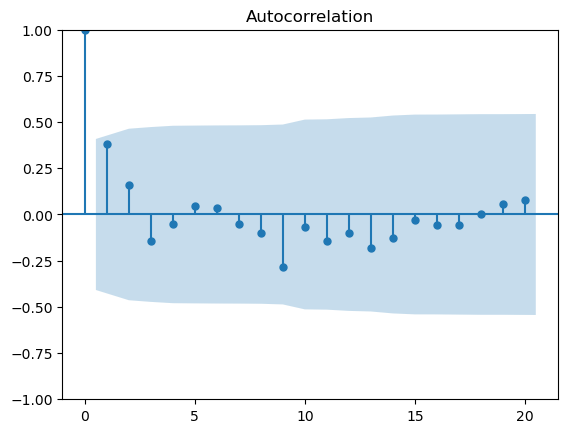

In [40]:
# Graphical Autocorrelation Test
acf = smt.graphics.plot_acf(resids1, lags=20, alpha=0.05)
acf.show()

In [41]:
# The Breusch-Godfrey autocorrelation test
BGtest = pd.DataFrame(stats_m.diagnostic.acorr_breusch_godfrey(model1, nlags=1), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Godfrey test ---')
print(BGtest)


 --- The Breusch-Godfrey test ---
                         value
chi^2 test statistic  7.694995
chi^2 test p-value    0.005537
F-test statistic      8.547198
F-test p-value        0.009477


### 3.3. Tests of the specification of Model 1

In [42]:
# discuss the goodness-of-fit of the model

In [43]:
# The RESET test
reset1 = reset_ramsey(model1, degree=3)
print(reset1)

<F test: F=19.806189707014408, p=4.694485962213142e-05, df_denom=16, df_num=2>


In [44]:
dfChicken.head(5)

,year,qc,pc,inc,pp,pb
0,1960,27.8,42.2,397.5,50.7,78.3
1,1961,29.9,38.1,413.3,52.0,79.2
2,1962,29.8,40.3,439.2,54.0,79.2
3,1963,30.8,39.5,459.7,55.3,79.2
4,1964,31.2,37.3,492.9,54.7,77.4


In [45]:
# Multicollinearity Test
dfXX = dfChicken.drop(['year', 'qc'], axis=1)

dfVIFs = pd.DataFrame()
dfVIFs['regressor'] = dfXX.columns
dfVIFs['VIF'] = np.linalg.inv(dfXX.corr().to_numpy()).diagonal().round(2)
dfVIFs

,regressor,VIF
0,pc,18.90
1,inc,52.70
2,pp,29.05
3,pb,39.76


In [46]:
# Correlation analysis
dfChicken.corr().round(3)

,year,qc,pc,inc,pp,pb
year,1.000,0.978,0.883,0.939,0.947,0.923
qc,0.978,1.000,0.840,0.947,0.912,0.935
pc,0.883,0.840,1.000,0.932,0.970,0.928
inc,0.939,0.947,0.932,1.000,0.957,0.986
pp,0.947,0.912,0.970,0.957,1.000,0.941
pb,0.923,0.935,0.928,0.986,0.941,1.000


### 3.4. Tests of the coefficients of Model 1

In [47]:
# linear hypotheses test
linHypothesis1 = '(inc = pb), (pb = 0)'
print(model1.f_test(linHypothesis1))

<F test: F=11.830871948234954, p=0.0005245846058757878, df_denom=18, df_num=2>


In [48]:
# Discuss the summary of Model 1:
# * signs and significance of the coefficients
# * overall significance of the model

## 4. Log-log regression analysis

In [49]:
# generate new regressors
dfChicken['logqc'] = np.log(dfChicken['qc'])
dfChicken['logpc'] = np.log(dfChicken['pc'])
dfChicken['loginc'] = np.log(dfChicken['inc'])
dfChicken['logpp'] = np.log(dfChicken['pp'])
dfChicken['logpb'] = np.log(dfChicken['pb'])

In [50]:
dfChicken.tail().round(2)

,year,qc,pc,inc,pp,pb,logqc,logpc,loginc,logpp,logpb
18,1978,46.7,63.7,1575.5,130.9,165.5,3.84,4.15,7.36,4.87,5.11
19,1979,50.6,61.6,1759.1,129.8,203.3,3.92,4.12,7.47,4.87,5.31
20,1980,50.1,58.9,1994.2,128.0,219.6,3.91,4.08,7.60,4.85,5.39
21,1981,51.7,66.4,2258.1,141.0,221.6,3.95,4.20,7.72,4.95,5.40
22,1982,52.9,70.4,2478.7,168.2,232.6,3.97,4.25,7.82,5.13,5.45


### 4.1. MODEL 2: Multivariate logarithmic regression

In [51]:
# estimate Model 2
model2 = ols('logqc ~ logpc + loginc + logpp + logpb', dfChicken).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logqc   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     249.9
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.67e-15
Time:                        10:40:11   Log-Likelihood:                 52.759
No. Observations:                  23   AIC:                            -95.52
Df Residuals:                      18   BIC:                            -89.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1898      0.156     14.063      0.000       1.863       2.517
logpc         -0.5046      0.111     -4.550      0.000      -0.738      -0.272
loginc         0.3426      0.083      4.114      0.001       0.168       0.517
logpp          0.1485      0.100      1.490      0.153      -0.061       0.358
logpb          0.0911      0.101      0.905      0.378      -0.120       0.303
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.078
Skew:                           0.427   Prob(JB):                        0.583
Kurtosis:                       2.370   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.2. Tests of disturbances of Model 2

In [52]:
# store model residuals
resids2 = model2.resid

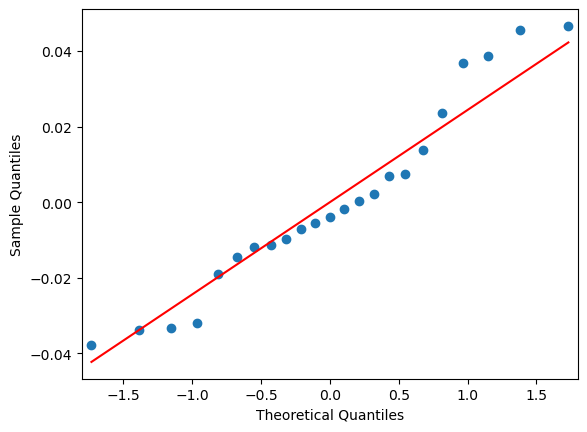

In [53]:
# Visual Normality Test
qqplot(resids2, line='s');

# Jarque-Bera test results are in the summary of Model 1

In [61]:
# The Breusch-Pagan heteroskedasticity test
BPtest = pd.DataFrame(sm.stats.diagnostic.het_breuschpagan(resids2, model2.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(BPtest)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  5.977008
chi^2 test p-value    0.200872
F-test statistic      1.580012
F-test p-value        0.222519


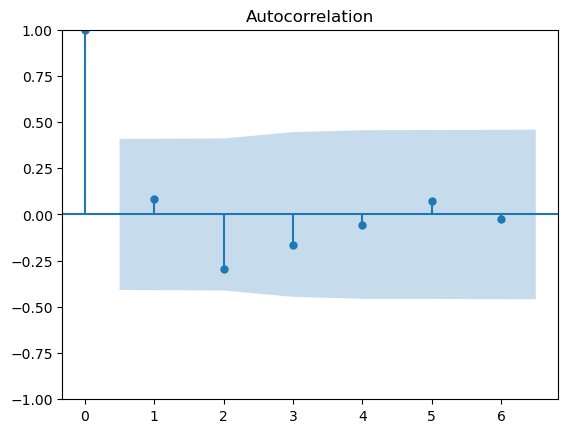

In [ ]:
# Graphical Autocorrelation Test
acf = smt.graphics.plot_acf(resids2, lags=6, alpha=0.05)
acf.show()

In [62]:
# The Breusch-Godfrey autocorrelation test
BGtest = pd.DataFrame(sm.stats.diagnostic.acorr_breusch_godfrey(model2, nlags=2), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Godfrey test ---')
print(BGtest)


 --- The Breusch-Godfrey test ---
                         value
chi^2 test statistic  2.471524
chi^2 test p-value    0.290613
F-test statistic      0.963159
F-test p-value        0.402746


### 4.3. Tests of the specification of Model 2

In [63]:
# The RESET test
reset2 = reset_ramsey(model2, degree=3)
print(reset2)

<F test: F=1.7575340956014627, p=0.20417345404777867, df_denom=16, df_num=2>


In [64]:
# Multicollinearity Test
dfXXlog = dfChicken.drop(['year', 'qc', 'pc', 'inc', 'pp', 'pb', 'logqc'], axis=1)

dfVIFslog = pd.DataFrame()
dfVIFslog['regressor'] = dfXXlog.columns
dfVIFslog['VIF'] = np.linalg.inv(dfXXlog.corr().to_numpy()).diagonal().round(2)
dfVIFslog

,regressor,VIF
0,logpc,17.49
1,loginc,65.11
2,logpp,41.43
3,logpb,42.31


In [65]:
# Correlation analysis
dfXXlog.corr().round(3)

,logpc,loginc,logpp,logpb
logpc,1.000,0.907,0.947,0.933
loginc,0.907,1.000,0.972,0.979
logpp,0.947,0.972,1.000,0.954
logpb,0.933,0.979,0.954,1.000


### 4.4. Tests of the coefficients of Model 2

In [66]:
# Discuss the summary of Model 2:
# * signs and significance of the coefficients
# * overall significance of the model

In [67]:
# linear hypotheses test for group (in)significance
linHypothesis2 = '(logpp = logpb), (logpb = 0)'
print(model2.f_test(linHypothesis2))

<F test: F=1.1392446294495695, p=0.3420835357269269, df_denom=18, df_num=2>


In [68]:
# linear hypotheses test of price elasticity
linHypothesis3 = '(logpc = -1)'
print(model2.f_test(linHypothesis3))

<F test: F=19.957543753413383, p=0.0002976686528111583, df_denom=18, df_num=1>


In [69]:
# linear hypotheses test of income elasticity
linHypothesis4 = '(loginc = 1)'
print(model2.f_test(linHypothesis4))

<F test: F=62.34191183308933, p=2.952909638185195e-07, df_denom=18, df_num=1>


## 5. Optimized logarithmic model

In [70]:
# estimate Model 3
model3 = ols('logqc ~ logpc + loginc', dfChicken).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logqc   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     491.9
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           9.87e-18
Time:                        11:05:02   Log-Likelihood:                 51.389
No. Observations:                  23   AIC:                            -96.78
Df Residuals:                      20   BIC:                            -93.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0328      0.116     17.497      0.000       1.790       2.275
logpc         -0.3722      0.063     -5.865      0.000      -0.505      -0.240
loginc         0.4515      0.025     18.284      0.000       0.400       0.503
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.676
Skew:                           0.634   Prob(JB):                        0.433
Kurtosis:                       2.624   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# compare with Model 3 with Model 2
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logqc   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     249.9
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.67e-15
Time:                        11:05:02   Log-Likelihood:                 52.759
No. Observations:                  23   AIC:                            -95.52
Df Residuals:                      18   BIC:                            -89.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1898      0.156     14.063      0.000       1.863       2.517
logpc         -0.5046      0.111     -4.550      0.000      -0.738      -0.272
loginc         0.3426      0.083      4.114      0.001       0.168       0.517
logpp          0.1485      0.100      1.490      0.153      -0.061       0.358
logpb          0.0911      0.101      0.905      0.378      -0.120       0.303
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.078
Skew:                           0.427   Prob(JB):                        0.583
Kurtosis:                       2.370   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Predictions

Let's say we know that in 1983 the values of our two variables were the following:

- Pc = 69.3
- Inc = 2567.7

In [72]:
# make a data-frame
dfChickenNew = pd.DataFrame({'logpc': [np.log(69.3)],
                             'loginc': [np.log(2567.7)]})
dfChickenNew

,logpc,loginc
0,4.238445,7.850766


In [73]:
# obtain a forecast
print(model3.get_prediction(dfChickenNew, weights=1).summary_frame(alpha=0.05).round(2))

   mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0   4.0     0.01           3.97           4.03          3.94          4.06


In [74]:
# calculate the exponent of the forecast
np.exp(4.0).round(3)

54.598